In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp  
from scipy.optimize import curve_fit

In [3]:
v, I1, I2, I3, I4, I5 = np.loadtxt('../Frank-Hertz and Photoelectric/Frank-Hertz - Data1.csv', delimiter=',', skiprows=7, unpack=True)
f, V1, V2, V3, V4, V5 = np.loadtxt('../Frank-Hertz and Photoelectric/Photoelectric - Data 2.csv', delimiter=',', usecols=(2, 3, 4, 5, 6, 7), skiprows=1, unpack=True)

Voltage = 11.666666666666666 +- 0.6236095644623235 V
Percentage Error = 1.3806706114398493 %


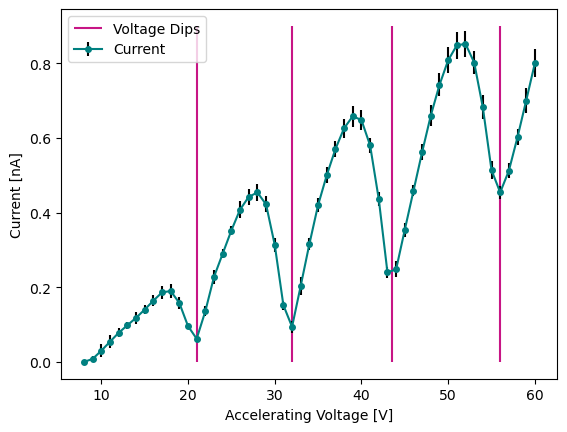

In [19]:
I = np.array([I1, I2, I3, I4, I5])

I_m = np.mean(I, axis=0)
I_std = np.std(I, axis=0)

d = np.array([21, 32, 43.5, 56])

plt.vlines(d[0], 0, 0.9, color='mediumvioletred', label='Voltage Dips')
for i in range(1, len(d)):
    plt.vlines(d[i], 0, 0.9, color='mediumvioletred')
    
gap = np.diff(d)
gap_m = np.mean(gap)
gap_std = np.std(gap)

gap_real = 11.83

gap_err = (1-(gap_m/gap_real))*100

print(f'Voltage = {gap_m} +- {gap_std} V')
print(f'Percentage Error = {gap_err} %')

plt.errorbar(v, I_m, yerr=I_std, fmt='o-', ms=4, color='teal', ecolor='k', label='Current')
plt.xlabel(r'Accelerating Voltage [V]')
plt.ylabel(r'Current [nA]')
plt.legend()
plt.show()

Plancks Constant = 4.984416836247377e-34 Js
Percentage Error = 24.774874188841277 %


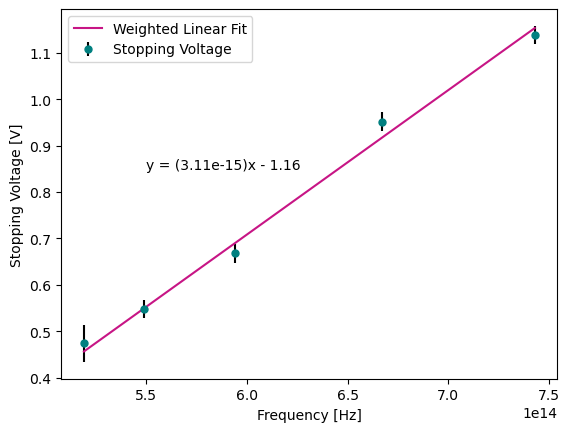

In [22]:
V = np.array([V1, V2, V3, V4, V5])

V_m = np.mean(V, axis=0)
V_std = np.std(V, axis=0)

p, q = np.polyfit(f, V_m, 1)

def line(a, b, x):
    return a*x+b

par, cov = curve_fit(line, f, V_m, sigma=V_std, absolute_sigma=True)

h = par[1]*1.602e-19
h_real = 6.626e-34
h_err = (1-(h/h_real))*100

h_abs_err = np.sqrt(cov[1][1])

print(f'Plancks Constant = {h} Js')
print(f'Percentage Error = {h_err} %')

plt.errorbar(f, V_m, yerr=V_std*5, fmt='o', ms=5, color='teal', ecolor='k', label='Stopping Voltage')
plt.plot(f, line(f, *par), color='mediumvioletred', label='Weighted Linear Fit')
plt.text(5.5e14, 0.85, f'y = ({np.round(par[1], 17)})x - {np.abs(np.round(par[0], 2))}')
plt.xlabel(f'Frequency [Hz]')
plt.ylabel(f'Stopping Voltage [V]')
plt.legend()
plt.show()